# Google Apps 商店的数据分析

## 简介
   该项目基于Kaggle中[Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps)中的数据集进行数据探索性分析，该数据集包含了Google Play商店的10K+的应用软件信息，其中数据变量代表的含义如下：

```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。
```

## 提出问题
- APP的下载量和哪些因素相关？
    - APP下载量的整体分布如何？
    - 不同Type的APP的下载量如何？
    - 不同年龄评级组(Content Rating)的下载量如何？
    - 不同流派(Genres)的APP的下载量如何？
    - 不同分类(Category)的APP下载量如何？
    - 不同年龄评级分组不同流派(Genres)的APP下载量如何？
    - 不同年龄评级分组不同分类(Category)的APP下载量如何？
    - 不同年龄评级分组不同Type的APP下载量如何？
    - 用户下载次数和价格(Price)之间有什么关系？
    - 用户评论数量(Review)和下载量之间有什么关系？
    - 用户每周的下载量变化？应用商店的业务发展态势如何？

- APP的分类和哪些因素相关？
    - APP的分类分布如何？
    - APP的分类和所属分类、年龄组评级组、分类之间的关系？
- APP用户评分和哪些因素相关？
    - 用户评分和年龄评级组、价格、评论数量之间有什么关系？那个年龄评级更容易给出高分？
    - 付费和免费用户的评分分布
    - 哪些APP的评分更高？
- APP用户评论数量和哪些因素相关？
    - 用户评论数量分布如何？
    - 用户评论数量和年龄评级组、付费/免费、类型、分类、价格之间的关系如何？

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc("figure",figsize = (18,5))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import seaborn as sns
sns.set(rc={'figure.figsize':(25,15)})

%matplotlib inline

## 整理数据

### 收集数据

In [87]:
df_googleplaystore = pd.read_csv("data/googleplaystore.csv")
df_reviews = pd.read_csv("./data/googleplaystore_user_reviews.csv")

### 数据评估

#### 目测评估

In [88]:
df_googleplaystore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [89]:
df_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


#### 编程评估

首先，对df_googleplaystore进行编程评估
- 获取数据的列名
    - App:APP名称
    - Category:APP所属分类
    - Rating:用户评分
    - Reviews:用户评论数量
    - Size:占存储空间的大小
    - Installs:用户下载和安装该APP的次数
    - Type:付费或免费
    - Price:价格，数值变量
    - Content Rating:年龄评级，Children / Mature 21+ / Adult
    - Genres:类型，一个应用可以数据多种类型，如音乐、游戏、家庭等
    - Last Updated:应用最新更新的日期。
    - Current Ver:APP当前版本
    - Android Ver:安装该应用所需要的最低安卓版本

In [90]:
df_googleplaystore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- 获取数据行列的基本情况
    - 数据由10841行13列数据组成

In [91]:
df_googleplaystore.shape

(10841, 13)

- 获取数据集的概况信息
    - 表格中存在一些数据类型错误。
        - Category、Type、Genres、Content Rating的数据为str，应该更改为Category
        - Reviews， Size Installs和Price的数据类型为str，应该更改为int
        - Last Updated的数据类型为str，更改为Date
    - 存在数值为空
        - Rating,Type,Content Rating,Current Ver,Android Ver存在空值，用众数进行填充。

In [92]:
df_googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- 查看数据中是否存在空值的个数
    - Rating存在1474个空值
    - Type存在1个空值
    - Content Rating存在1个空值
    - Current Ver存在8个空值
    - Android Ver存在3个空值
    - 其他数据不存在空值

In [93]:
df_googleplaystore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- 查看重复数据
    - 存在483个重复数据，对重复数据进行删除

In [94]:
sum(df_googleplaystore.duplicated())

483

- 查看各列数据的唯一值取值情况
    - Type存在0的数据，无明确含义，将0更改为Free。
    - Last Updated存在如数值1.0.19等无明确含义的数据，删除无明确时间含义的数据。
    - Category中存在值为1.9的无意义数据，将无意义的数据删除
    - Installs中存在值为Free的无意义数据，将其修改为0
    - Installs中包含`,`和`+`等字符，将`，`和`+`等字符删除
    - Price存在Everyone的无效字符，将相关数据删除。
    - Price中包含`$`字符，将`$`字符删除
    - Size中包含k和M等字符，将k替换为数字*1024，将M替换为数字乘以1024*1024
    - Review中有数据包含M字符，将其替换为数字乘以1024*1024

In [95]:
for item in df_googleplaystore.columns:
    print('*'*40, item, "*" * 40)
    print(df_googleplaystore[item].unique())

**************************************** App ****************************************
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
**************************************** Category ****************************************
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
**************************************** Rating ****************************************
[ 4.1  3.9  4.7  4.5  4.

对df_reviews表格进行编程评估

- 查看表格中的列名
    - App:应用名称
    - Translated_Review用户评论
    - Sentiment:正/负/中性评价
    - Sentiment_Polarity:情绪极性评分
    - Sentiment_Subjectivity：情绪主观性得分

In [96]:
df_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

- 查看数据的行列基本情况
    - df_reviews有64295行5列数据

In [97]:
df_reviews.shape

(64295, 5)

- 查看数据的概况信息
    - Translated_Review、Sentiment、Sentiment_Polarity、Sentiment_Subjectivity中存在空值

In [98]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


- 查看空值的个数
    - Translated_Review存在26868个空值
    - Sentiment存在26863个空值
    - Sentiment_Polarity存在26863个空值
    - Sentiment_Subjectivity存在26863个空值

In [99]:
df_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

- 查看Sentiment的唯一值

In [100]:
df_reviews["Sentiment"].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

`df_googleplaystore`表格存在的质量问题

- 列名中存在空格，需要删除空格
- 数据类型存在错误
    - Category、Type、Genres、Content Rating的数据为str，应该更改为Category
    - Reviews， Size Installs和Price的数据类型为str，应该更改为int
    - Last Updated的数据类型为str，更改为Date
- 存在重复数据，将重复数据删除
- Rating,Type,Content Rating,Current Ver,Android Ver存在空值，用众数进行填充。
- 存在数据不一致的问题
    - Type存在0的数据，无明确含义，将0更改为Free。
    - Last Updated存在如数值1.0.19等无明确含义的数据，删除无明确时间含义的数据。
    - Category中存在值为1.9的无意义数据，将无意义的数据删除
    - Installs中存在值为Free的无意义数据，将其修改为0
    - Installs中包含`,`和`+`等字符，将`，`和`+`等字符删除
    - Price存在Everyone的无效字符，将相关数据删除。
    - Price中包含`$`字符，将`$`字符删除
    - Size中包含k和M等字符，将k替换为数字*1024，将M替换为数字乘以1024*1024
    - Review中有数据包含M字符，将其替换为数字乘以1024*1024
    

`df_reviews`表格存在的质量问题
- Translated_Review、Sentiment、Sentiment_Polarity、Sentiment_Subjectivity中存在空值
    - Translated_Review存在26868个空值
    - Sentiment存在26863个空值
    - Sentiment_Polarity存在26863个空值
    - Sentiment_Subjectivity存在26863个空值

### 清洗数据

数据清洗前，首先进行数据备份

In [101]:
df_cleaned_googleplaystore = df_googleplaystore.copy()
df_cleaned_reviews = df_reviews.copy()

#### 问题定义1： 列名中存在空格，去除空格

#### 代码

In [102]:
df_cleaned_googleplaystore.rename(columns= lambda name : name.replace(" ", ""), inplace=True)

#### 测试

In [103]:
df_cleaned_googleplaystore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'ContentRating', 'Genres', 'LastUpdated', 'CurrentVer',
       'AndroidVer'],
      dtype='object')

#### 问题定义2：存在重复数据，将重复数据删除
#### 代码

In [104]:
df_cleaned_googleplaystore.drop_duplicates(inplace=True)
df_cleaned_googleplaystore.reset_index(inplace=True, drop=True)

In [105]:
df_cleaned_googleplaystore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'ContentRating', 'Genres', 'LastUpdated', 'CurrentVer',
       'AndroidVer'],
      dtype='object')

#### 测试

In [106]:
sum(df_cleaned_googleplaystore.duplicated())

0

#### 问题定义3：Type中存在不一致的数据
- Type存在0的数据，无明确含义，将0更改为Free。

#### 代码

In [107]:
df_cleaned_googleplaystore["Type"] = df_cleaned_googleplaystore["Type"].str.replace("0", "Free")

#### 测试

In [108]:
df_cleaned_googleplaystore["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

#### 问题定义4：Last Updated中存在不一致的数据
- Last Updated存在如数值1.0.19等无明确含义的数据，删除无明确时间含义的数据。

#### 代码

In [109]:
indexs = df_cleaned_googleplaystore[df_cleaned_googleplaystore["LastUpdated"] == "1.0.19"].index
df_cleaned_googleplaystore.drop(indexs, inplace=True)

#### 测试

In [110]:
sum(df_cleaned_googleplaystore["LastUpdated"] == "1.0.19")

0

#### 问题定义5：Category中存在不一致的数据
- Category中存在值为1.9的无意义数据，将无意义的数据删除

#### 代码

In [111]:
indexs = df_cleaned_googleplaystore[df_cleaned_googleplaystore["Category"] == "1.9"].index
df_cleaned_googleplaystore.drop(indexs, inplace=True)

#### 测试

In [112]:
sum(df_cleaned_googleplaystore["Category"] == "1.9")

0

#### 问题定义6：InStalls中包含不一致的数据
- Installs中存在值为Free的无意义数据，将其修改为0
- Installs中包含`,`和`+`等字符，将`，`和`+`等字符删除

#### 代码

In [113]:
df_cleaned_googleplaystore["Installs"] = df_cleaned_googleplaystore["Installs"].str.replace("Free", "0")
df_cleaned_googleplaystore["Installs"] = df_cleaned_googleplaystore["Installs"].str.rstrip("+").str.replace(",","").astype(int)

#### 测试

In [114]:
df_cleaned_googleplaystore["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

#### 问题定义7：Price中存在不一致的数据
- Price存在Everyone的无效字符，将其替换为0。
- Price中包含`$`字符，将`$`字符删除

#### 代码

In [115]:
df_cleaned_googleplaystore["Price"] = df_cleaned_googleplaystore["Price"].str.replace("Everyone", "0")
df_cleaned_googleplaystore["Price"] = df_cleaned_googleplaystore["Price"].apply(lambda x : float(x[1:]) if x[0] == '$' else float(x))

##### 测试

In [116]:
df_cleaned_googleplaystore["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

#### 问题定义8:Size中包含不一致的数据
- Size中包含k和M等字符，将k替换为数字*1024，将M替换为数字乘以1024的平方

#### 代码

In [117]:
df_cleaned_googleplaystore["Size"] = df_googleplaystore["Size"].apply(lambda x:float(x[:-1])*1024*1024 \
            if x[-1] =="M" else float(x[:-1])*1024 if x[-1] == "k" else 0)

#### 测试

In [118]:
sum(df_cleaned_googleplaystore["Size"].apply(lambda x : 1 if (str(x)[-1] == "M" or str(x)[-1] == "k")else 0 ))

0

#### 问题定义9：Reviews中存在数据不一致的问题
- Review中有数据包含M字符，将其替换为数字乘以1024*1024
#### 代码

In [119]:
df_cleaned_googleplaystore["Reviews"] = df_cleaned_googleplaystore["Reviews"]. \
    apply(lambda x : float(x[:-1]) * 1024 if x[-1] == "M" else float(x))

#### 测试

In [120]:
sum(df_cleaned_googleplaystore["Reviews"].apply(lambda x : 1 if str(x)[-1] == "M" else 0))

0

#### 问题定义10：数据类型存在错误
- Category、Type、Genres、Content Rating的数据为str，应该更改为Category
- Reviews， Size Installs和Price的数据类型为str，应该更改为int
- Last Updated的数据类型为str，更改为Date

#### 代码

In [121]:
df_cleaned_googleplaystore["Genres"] = df_cleaned_googleplaystore["Genres"].astype('category')
df_cleaned_googleplaystore["ContentRating"] = df_cleaned_googleplaystore["ContentRating"].astype('category')
df_cleaned_googleplaystore["Type"] = df_cleaned_googleplaystore["Type"].astype('category')
df_cleaned_googleplaystore["LastUpdated"] = pd.to_datetime(df_cleaned_googleplaystore["LastUpdated"])
df_cleaned_googleplaystore["Reviews"] = df_cleaned_googleplaystore["Reviews"].astype("int")
df_cleaned_googleplaystore["Size"] = df_cleaned_googleplaystore["Size"].astype("int")
df_cleaned_googleplaystore["Installs"] = df_cleaned_googleplaystore["Installs"].astype("int")
df_cleaned_googleplaystore["Price"] = df_cleaned_googleplaystore["Price"].astype("int")

#### 测试

In [122]:
df_cleaned_googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
App              10357 non-null object
Category         10357 non-null object
Rating           8892 non-null float64
Reviews          10357 non-null int32
Size             10357 non-null int32
Installs         10357 non-null int32
Type             10356 non-null category
Price            10357 non-null int32
ContentRating    10357 non-null category
Genres           10357 non-null category
LastUpdated      10357 non-null datetime64[ns]
CurrentVer       10349 non-null object
AndroidVer       10355 non-null object
dtypes: category(3), datetime64[ns](1), float64(1), int32(4), object(4)
memory usage: 764.8+ KB


#### 问题定义11: Rating,Type,Content Rating,Current Ver,Android Ver存在NAN
- Rating(用户评分)用均值进行缺失值填充。
- Type(付费或免费)只缺失一个值，取众数(大多数人的选择)进行缺失值的填充。
- Content Rating缺失一个值，取众数(大多数人的选择)进行缺失值的填充。
- Current Ver(当前应用的版本）是字符串变量，取众数(大多数情况)进行缺失值填充
- Android Ver是字符串变量，取众数(大多数情况)进行缺失值填充

#### 代码

In [123]:
df_cleaned_googleplaystore["Rating"].fillna(df_cleaned_googleplaystore["Rating"].mean(), inplace=True)
df_cleaned_googleplaystore["Type"].fillna(df_cleaned_googleplaystore["Type"].mode()[0], inplace=True)
df_cleaned_googleplaystore["ContentRating"].fillna(df_cleaned_googleplaystore["ContentRating"].mode()[0], inplace=True)
df_cleaned_googleplaystore["CurrentVer"].fillna(df_cleaned_googleplaystore["CurrentVer"].mode()[0], inplace=True)
df_cleaned_googleplaystore["AndroidVer"].fillna(df_cleaned_googleplaystore["AndroidVer"].mode()[0], inplace=True)

#### 测试

In [124]:
df_cleaned_googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
App              10357 non-null object
Category         10357 non-null object
Rating           10357 non-null float64
Reviews          10357 non-null int32
Size             10357 non-null int32
Installs         10357 non-null int32
Type             10357 non-null category
Price            10357 non-null int32
ContentRating    10357 non-null category
Genres           10357 non-null category
LastUpdated      10357 non-null datetime64[ns]
CurrentVer       10357 non-null object
AndroidVer       10357 non-null object
dtypes: category(3), datetime64[ns](1), float64(1), int32(4), object(4)
memory usage: 764.8+ KB


#### 问题定义12:df_reviews中存在空值，将空值删除
- Translated_Review存在26868个空值
- Sentiment存在26863个空值
- Sentiment_Polarity存在26863个空值
- Sentiment_Subjectivity存在26863个空值

#### 代码

In [125]:
df_cleaned_reviews.dropna(subset=["Translated_Review"], inplace= True)

#### 测试

In [126]:
df_cleaned_reviews.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

## 数据探索分析

In [127]:
df_cleaned_googleplaystore.reset_index()
# 由于Installs和Size的数据量级比较大，进行log收敛处理，数据加1是为了解决RuntimeWarning: divide by zero encountered in log。
df_cleaned_googleplaystore["InstallsLog"] = np.log(df_cleaned_googleplaystore["Installs"] + 1)
df_cleaned_googleplaystore["SizeLog"] = np.log(df_cleaned_googleplaystore["Size"] + 1)

In [128]:
df_cleaned_googleplaystore.describe()

,Rating,Reviews,Size,Installs,Price,InstallsLog,SizeLog
count,10357.000000,1.035700e+04,1.035700e+04,1.035700e+04,10357.000000,10357.000000,10357.000000
mean,4.187877,4.059046e+05,1.903546e+07,1.415776e+07,0.965241,11.103410,13.671239
std,0.484020,2.696778e+06,2.341518e+07,8.023955e+07,16.226821,4.521306,6.116810
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,4.100000,3.200000e+01,2.621440e+06,1.000000e+03,0.000000,6.908755,14.779235
50%,4.200000,1.680000e+03,9.437184e+06,1.000000e+05,0.000000,11.512935,16.060168
75%,4.500000,4.641600e+04,2.726298e+07,1.000000e+06,0.000000,13.815512,17.121040
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,20.723266,18.468114


D:\Programs\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Programs\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Programs\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Programs\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


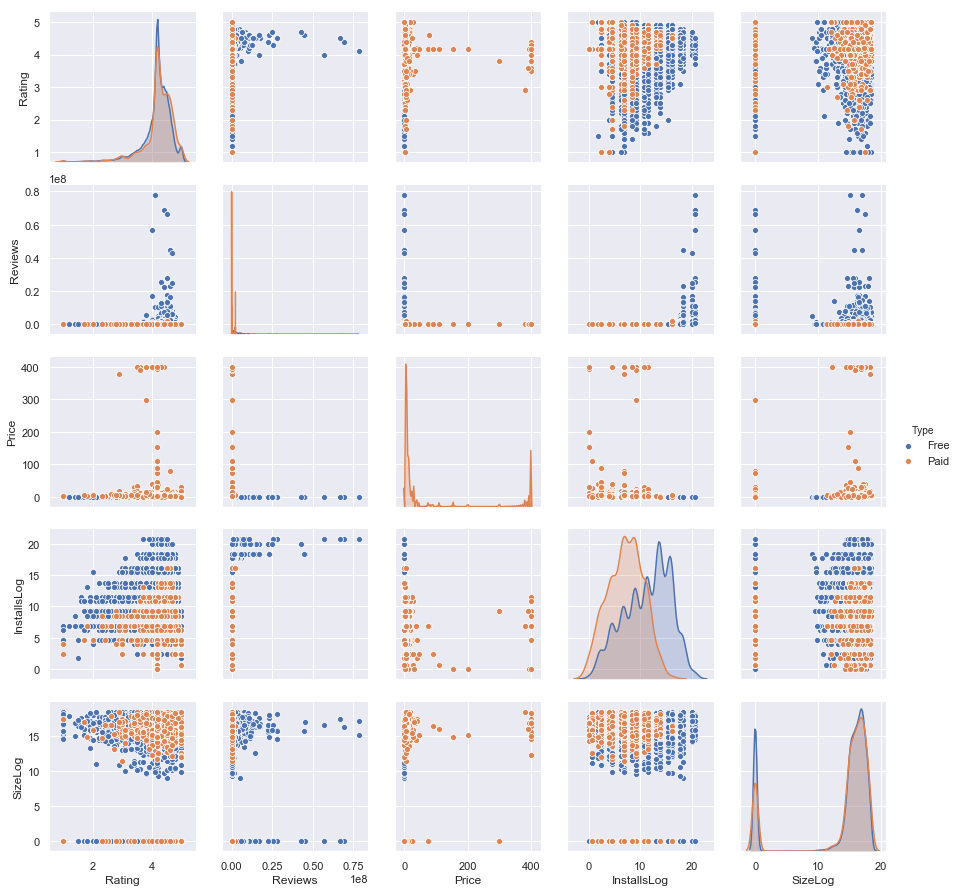

In [129]:
sns.pairplot(data=df_cleaned_googleplaystore,
             vars = ['Rating', 'Reviews', 'Price', 'InstallsLog', 'SizeLog'], 
             hue = "Type");

### APP占据的市场份额研究

- 不同种类的市场上APP占比
- 不同评分的APP数量分布
- 不同流派的APP数量分布
- 不同年龄分组的APP数量分布
- 不同分布、评分的APP数量分布

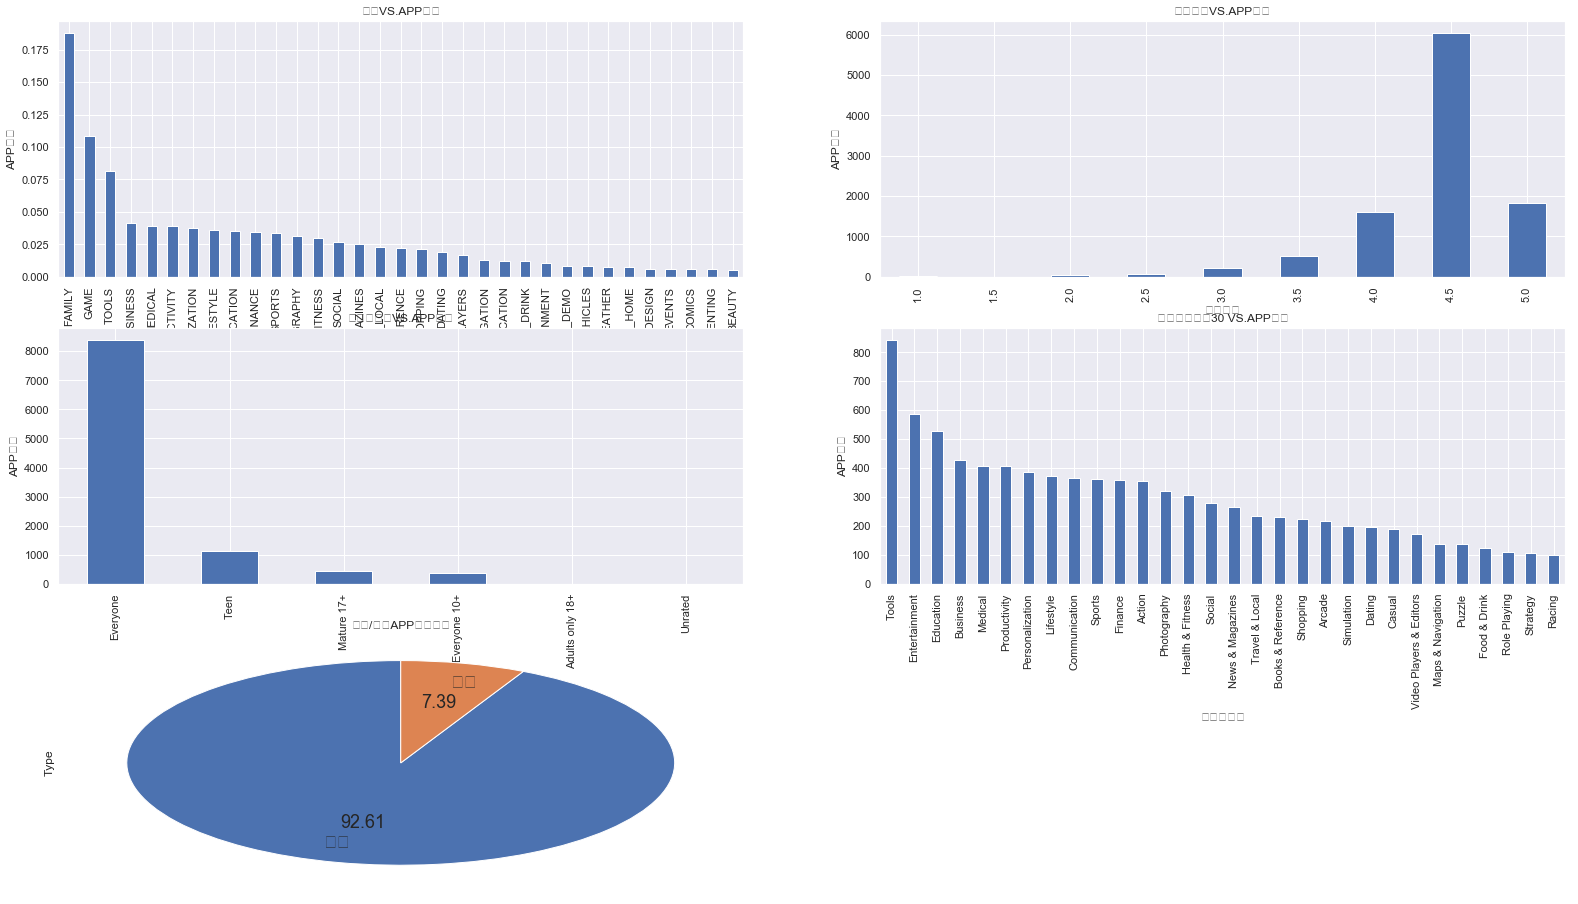

In [227]:
# 将用户评分划分为0到5，间隔为0.5的区间组
df_cleaned_googleplaystore["RatingGroup"] =  pd.cut(
    df_cleaned_googleplaystore["Rating"], \
    bins = [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],\
    labels = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

plt.figure(figsize=(27,16))
plt.subplot(321)
num_category = df_cleaned_googleplaystore["Category"] \
                    .value_counts().sort_values(ascending=False) \
                        / df_cleaned_googleplaystore.shape[0]
num_category.plot(kind = "bar")
plt.ylabel("APP数量")
plt.title("种类VS.APP占比");

plt.subplot(322)
df_cleaned_googleplaystore.groupby("RatingGroup")["App"].count().plot(kind = "bar")
plt.xlabel("用户评分")
plt.ylabel("APP数量")
plt.title("用户评分VS.APP数量");

plt.subplot(323)
df_cleaned_googleplaystore.groupby("ContentRating")["App"].count()\
                .sort_values(ascending=False).plot(kind = "bar")
plt.xlabel("年龄评级组")
plt.ylabel("APP数量")
plt.title("年龄评级组VS.APP数量");

plt.subplot(324)
df_cleaned_googleplaystore.groupby("Genres")["App"].count()\
            .sort_values().sort_values(ascending=False)[0:30].plot(kind = "bar")
plt.xlabel("年龄评级组")
plt.ylabel("APP数量")
plt.title("年龄评级组前30 VS.APP数量");

plt.subplot(325)
df_cleaned_googleplaystore["Type"].value_counts()\
                .plot.pie(labels = ["免费", "付费"], labeldistance = 0.8,\
                          autopct='%.2f',\
                          fontsize=18, startangle = 90)
plt.title("免费/付费APP数量占比");

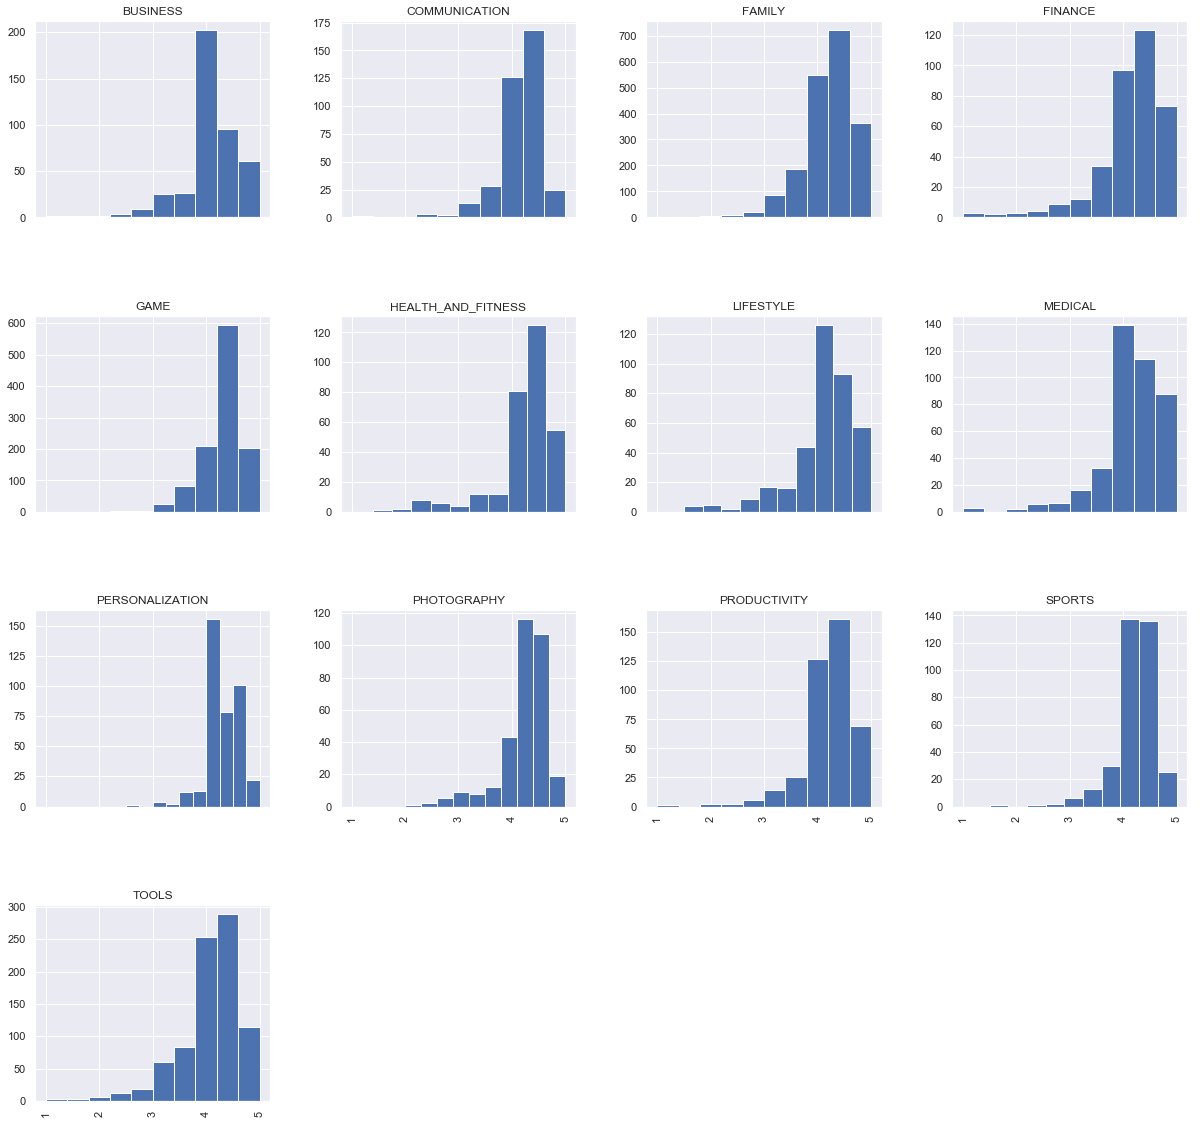

In [237]:
groups_by_category = df_cleaned_googleplaystore.groupby('Category')\
            .filter(lambda x: len(x) > 300).reset_index()
groups_by_category['Rating'].hist(by=groups_by_category['Category'],\
                                  sharex=True, figsize=(20,20));

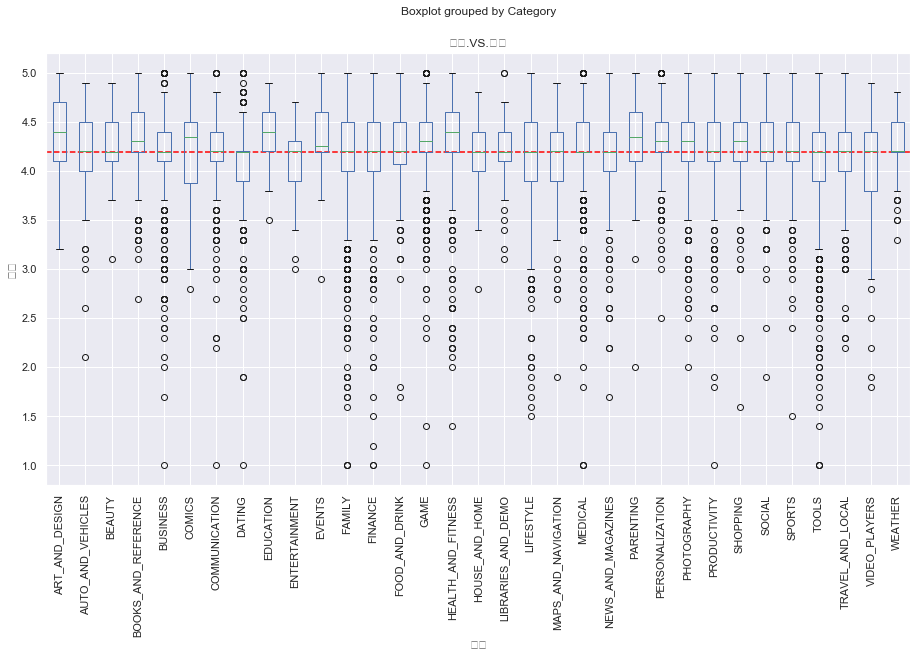

In [313]:
df_cleaned_googleplaystore.boxplot(column= "Rating", 
                                   by='Category', rot=90, figsize = (15, 8));
left, right = plt.xlim()
plt.hlines(df_cleaned_googleplaystore["Rating"].mean(), \
           xmin = left, xmax = right, linestyles ='dashed',\
           colors = "red", label = "均值")
plt.xlabel("类型")
plt.ylabel("评分")
plt.title("类型.VS.类型");

In [ ]:
# 查找流派中APP数量前15的对应的流派名称
index_genres_15 = df_cleaned_googleplaystore["Genres"]\
                    .value_counts().sort_values(ascending=False).index[0:15]
# 过滤出前15流派的信息
df_genres15 = df_cleaned_googleplaystore[\
                    df_cleaned_googleplaystore["Genres"].isin(index_genres_15)]\
                    .reset_index(drop = True)
# 按照流派进行分组
groups_by_genres = df_genres15.groupby('Genres')\
            .filter(lambda x: len(x) > 100).reset_index(drop = True)

groups_by_genres["Rating"].hist(by = groups_by_genres["Genres"],\
                               sharex = True, figsize = (20, 20));

### APP评分相关因素研究
- 不同分类APP评分
- 不同流派的APP评分
- 不同年龄分组的APP评分

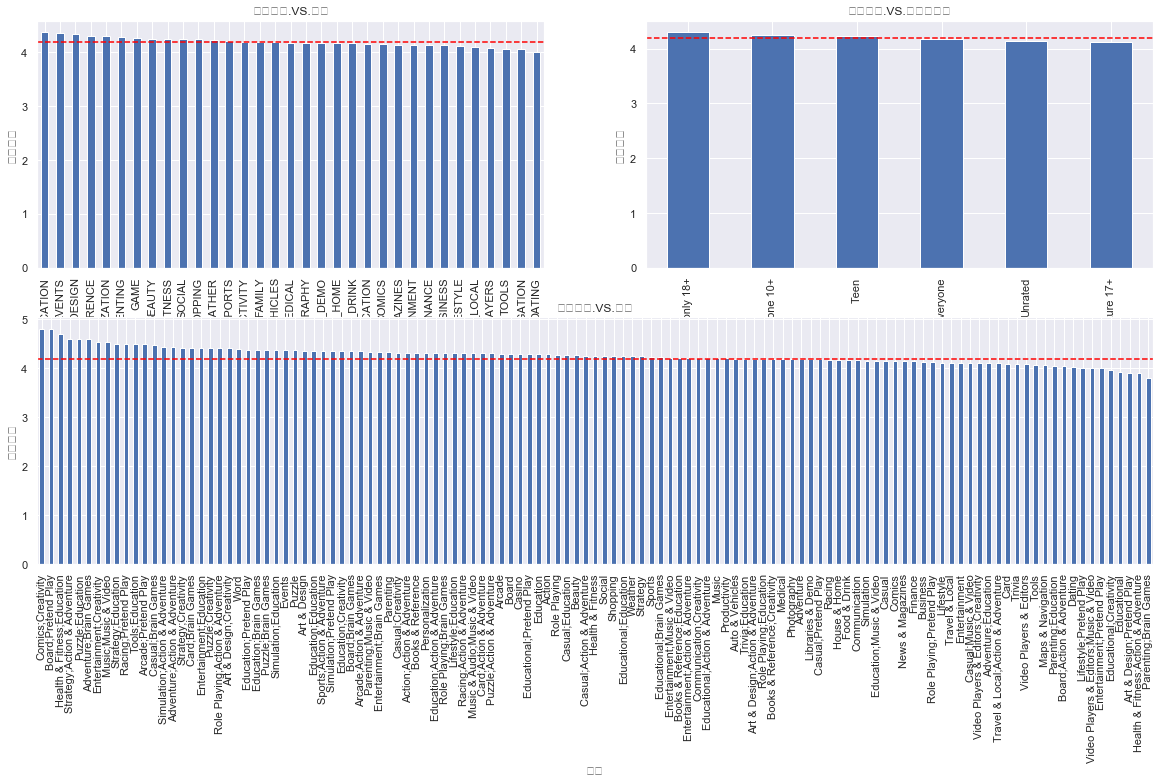

In [347]:
plt.figure(figsize=(20, 10))
rating_mean = df_cleaned_googleplaystore["Rating"].mean()

ax0 = plt.subplot(221)
mean_rating_by_category = df_cleaned_googleplaystore.groupby("Category")["Rating"]\
                                .mean().sort_values(ascending=False)
mean_rating_by_category.plot(kind = "bar", ax = ax0)
left, right = plt.xlim()
plt.hlines(rating_mean, xmin=left, xmax=right, linestyles ='dashed',\
           colors = "red", label = "总体均值")
plt.xlabel("分类")
plt.ylabel("评分均值")
plt.title("评分均值.VS.分类")

ax1 = plt.subplot(222)
mean_rating_by_contentrating = df_cleaned_googleplaystore.groupby("ContentRating")["Rating"]\
                                .mean().sort_values(ascending=False)
mean_rating_by_contentrating.plot(kind = "bar", ax = ax1)
left, right = plt.xlim()
plt.hlines(rating_mean, xmin=left, xmax=right, linestyles ='dashed',\
           colors = "red", label = "总体均值");
plt.xlabel("年龄评级组")
plt.ylabel("评分均值")
plt.title("评分均值.VS.年龄评级组")

ax2 = plt.subplot(212)
mean_rating_by_category = df_cleaned_googleplaystore.groupby("Genres")["Rating"]\
                                .mean().sort_values(ascending=False)
mean_rating_by_category.plot(kind = "bar", ax = ax2)
left, right = plt.xlim()
plt.hlines(rating_mean, xmin=left, xmax=right, linestyles ='dashed',\
           colors = "red", label = "总体均值");
plt.xlabel("流派")
plt.ylabel("评分均值")
plt.title("评分均值.VS.流派");

### APP下载量相关因素研究

- 不同分类APP下载量
- 不同流派的APP下载量
- 不同年龄分组的APP下载量
- 不同评分组的APP下载量

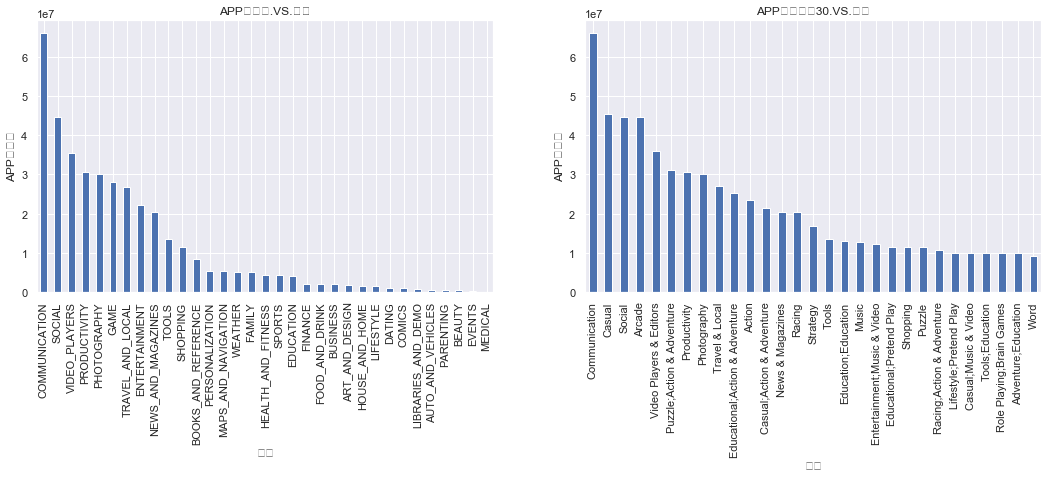

In [286]:
plt.figure(figsize=(18,5))
plt.subplot(121)
mean_Installs_by_category =  df_cleaned_googleplaystore.groupby(["Category"]) \
                .Installs.mean().sort_values(ascending = False)
mean_Installs_by_category.plot(kind = 'bar')
plt.xlabel("分类")
plt.ylabel("APP下载量")
plt.title("APP下载量.VS.分类");

plt.subplot(122)
mean_Installs_by_genres =  df_cleaned_googleplaystore.groupby(["Genres"]) \
                .Installs.mean().sort_values(ascending = False)[1:30]
mean_Installs_by_genres.plot(kind = 'bar')
plt.xlabel("流派")
plt.ylabel("APP下载量")
plt.title("APP下载量前30.VS.流派");

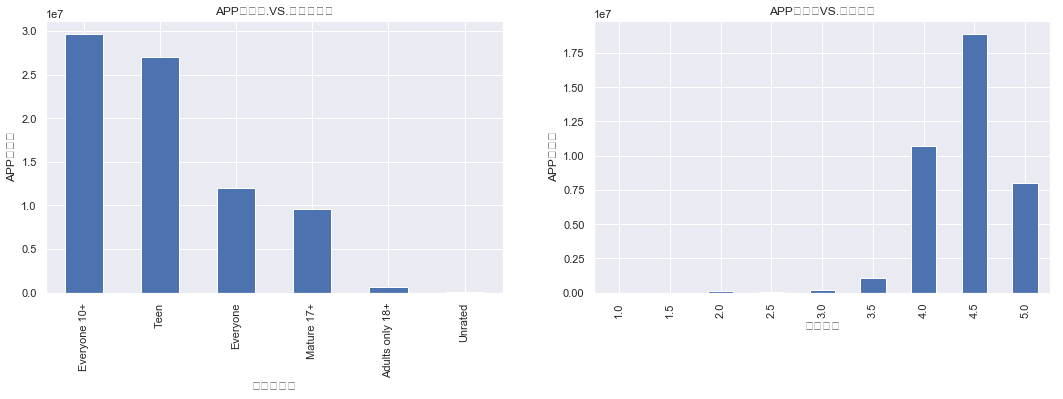

In [289]:
plt.figure(figsize=(18,5))
plt.subplot(121)
mean_Installs_by_contentrating =  df_cleaned_googleplaystore.groupby(["ContentRating"]) \
                .Installs.mean().sort_values(ascending = False)
mean_Installs_by_contentrating.plot(kind = 'bar')
plt.xlabel("年龄评级组")
plt.ylabel("APP下载量")
plt.title("APP下载量.VS.年龄评级组");

plt.subplot(122)
mean_Installs_by_ratinggroup =  df_cleaned_googleplaystore.groupby(["RatingGroup"]) \
                .Installs.mean()
mean_Installs_by_ratinggroup.plot(kind = 'bar')
plt.xlabel("评分分组")
plt.ylabel("APP下载量")
plt.title("APP下载量VS.评分分组");

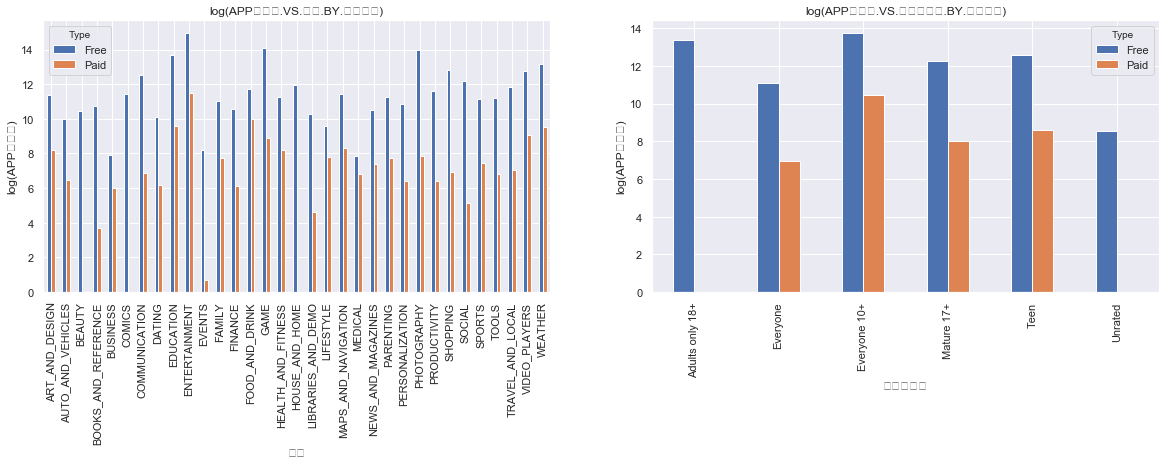

In [318]:
fig = plt.figure(figsize=(20, 5))
ax0 = plt.subplot(121)
df_cleaned_googleplaystore.groupby(["Category", "Type"])["InstallsLog"] \
            .mean().sort_values().unstack().plot(kind = 'bar', ax = ax0)
plt.xlabel("分类")
plt.ylabel("log(APP下载量)")
plt.title("log(APP下载量.VS.分类.BY.是否付费)")

ax1 = plt.subplot(122)
df_cleaned_googleplaystore.groupby(["ContentRating", "Type"])["InstallsLog"]\
            .mean().sort_values().unstack().plot(kind = 'bar', ax = ax1)
plt.xlabel("年龄评级组")
plt.ylabel("log(APP下载量)")
plt.title("log(APP下载量.VS.年龄评级组.BY.是否付费)");

In [ ]:
## 

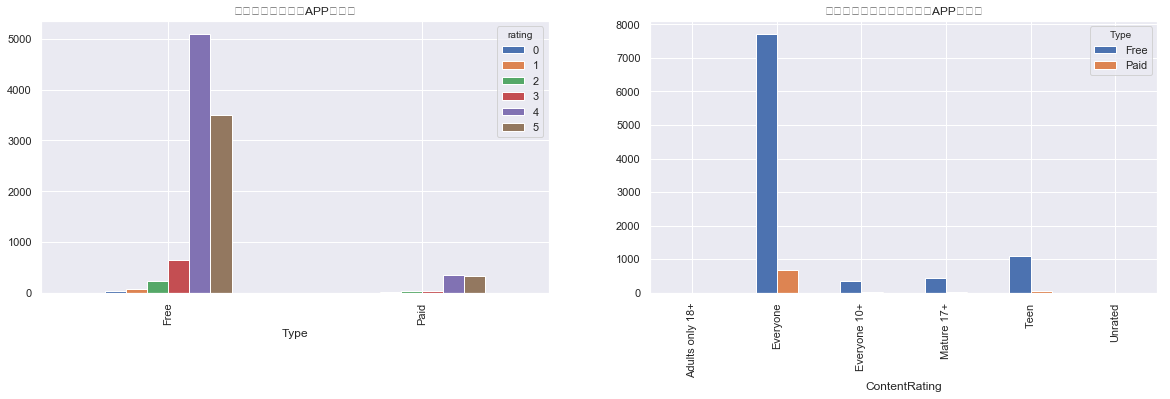

In [324]:
plt.figure(figsize=(20, 5))
ax0 = plt.subplot(121)
df_cleaned_googleplaystore["rating"] = pd.cut(df_cleaned_googleplaystore["Rating"], bins=6, labels=False)
df_cleaned_googleplaystore.groupby(["Type"]).rating.\
        value_counts().unstack().plot(kind="bar", title="评分在免费和付费APP中分布", ax = ax0)

ax1 = plt.subplot(122)
df_cleaned_googleplaystore.groupby(["Type"]).ContentRating.\
        value_counts().unstack().plot(kind="bar", title="年龄组评级组在付费和免费APP中分布", ax = ax1);

D:\Programs\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


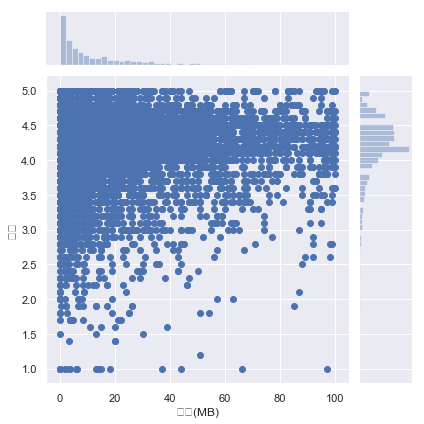

In [367]:
ax = sns.jointplot(df_cleaned_googleplaystore['Size']/1024/1024, \
                   df_cleaned_googleplaystore['Rating'])
ax.set_axis_labels(xlabel="大小(MB)", ylabel="评分");

In [ ]:
plt.xlabel()
plt.ylabel("评分")
ax.set_title("大小(MB).VS.评分");

- APP用户评论数量和哪些因素相关？
    - 用户评论数量分布如何？
    - 用户评论数量和年龄评级组、付费/免费、类型、分类、价格之间的关系如何？

不同流派数据处理

In [ ]:
df_contentrating_type = df_googleplaystore[["Content Rating", "App"]].groupby("Content Rating").count()
df_contentrating_type.plot(kind="pie", labeldistance=0.75, autopct='%.1f%%', subplots=True)

In [ ]:
df_free_by_content_rating = df_googleplaystore[df_googleplaystore["Type"] == "Free"][["App", "Content Rating"]].groupby("Content Rating").count()
df_free_by_content_rating

In [ ]:
df_free_by_content_rating.plot(kind="pie", labeldistance=0.75, autopct='%.1f%%', subplots=True)

选择免费App中年龄分组Everyone的用户最多，占比为79.9%，其次是Teen，占比为11.5%。

In [ ]:
df_paid_by_content_rating = df_googleplaystore[df_googleplaystore["Type"] == "Paid"][["App", "Content Rating"]].groupby("Content Rating").count()
df_paid_by_content_rating

In [ ]:
df_paid_by_content_rating.plot(kind="pie", labeldistance=0.75, autopct='%.1f%%', subplots=True)

选择付费App中年龄分组Everyone的用户最多，占比为86.9%，其次是Teen，占比为6.5%。

In [ ]:
df_free_by_category = df_googleplaystore[df_googleplaystore["Type"] == "Free"][["App", "Category"]].groupby("Category").count()
df_free_by_category.plot(kind="pie", labeldistance=0.75, autopct='%.2f%%', subplots=True, figsize=(15, 15))

免费用户更喜欢FAMILY类型，占比为17.74%，其次是GAME, TOOLS,占比依次是10.57%和7.62%.

In [ ]:
df_paid_by_category = df_googleplaystore[df_googleplaystore["Type"] == "Paid"][["App", "Category"]].groupby("Category").count()
df_paid_by_category.plot(kind="pie", labeldistance=0.75, autopct='%.2f%%', subplots=True, figsize=(15, 15))

付费用户更喜欢FAMILY类型，占比为23.87%，其次是MEDICAL, PRESONALIZATION, GAME,占比依次是13.67%和10.37%，10.37%

In [ ]:
df_free_by_genres = df_googleplaystore[df_googleplaystore["Type"] == "Free"][["App", "Genres"]].groupby("Genres").count()
#df_free_by_genres.plot(kind="pie", labeldistance=0.5, autopct='%.2f%%', subplots=True, figsize=(15, 15))
df_free_by_genres.plot(kind="bar",figsize=(15, 15))

免费用户最喜欢Tools流派的APP，其次是Entertainment和Education。

In [ ]:
df_paid_by_genres = df_googleplaystore[df_googleplaystore["Type"] == "Paid"][["App", "Genres"]].groupby("Genres").count()
#df_paid_by_genres.plot(kind="pie", labeldistance=0.75, autopct='%.2f%%', subplots=True, figsize=(15, 15))
df_paid_by_genres.plot(kind="bar", figsize=(15, 15))

付费用户最喜欢Medical流派的APP，其次是Personalization和Tools。

In [ ]:
df_cur_ver = df_googleplaystore[["Current Ver", "App"]].groupby("Current Ver").count().sort_values(by="App",ascending=False)[:15]
df_cur_ver.plot(kind="pie", labeldistance=0.75, autopct='%.1f%%', subplots=True, figsize=(10, 10))

使用前15名的当前版本中varies with device使用率最高，占比为38.8%，其次是1.0和1.1，占比分别是21.5%和7.0%。

In [ ]:
df_android_ver = df_googleplaystore[["Android Ver", "App"]].groupby("Android Ver").count().sort_values(by="App",ascending=False)[:15]
df_android_ver.plot(kind="pie", labeldistance=0.75, autopct='%.1f%%', subplots=True, figsize=(10, 10))

使用前15名的安卓版本中4.1 and up使用率最高，占比为23.0%，其次是4.0.3 and up和4.0 and up，占比分别是14.1%和12.9%。

In [ ]:
df_reviewss_by_genres = df_googleplaystore[["Reviews", "Genres"]].groupby("Genres").sum().sort_values(by="Reviews",ascending=False)[:5]
df_reviewss_by_genres

Communication收到的评论最多，其次是Social和Casual。

In [ ]:
df_reviewss_by_category = df_googleplaystore[["Reviews", "Category"]].groupby("Category").sum().sort_values(by="Reviews",ascending=False)[:5]
df_reviewss_by_category

在不同的分类中，GAME收到的用户评论最多，其次是COMMUNICATION和SOCIAL.

In [ ]:
df_reviewss_by_type = df_googleplaystore[["Reviews", "Type"]].groupby("Type").sum()
df_reviewss_by_type.plot(kind="pie", labeldistance=0.75, autopct='%.1f%%', subplots=True, figsize=(10, 10))

免费用户给出的评论数更多，占比高达99.7%。

In [ ]:
df_reviewss_by_content_rating = df_googleplaystore[["Reviews", "Content Rating"]].groupby("Content Rating").sum()
df_reviewss_by_content_rating.plot(kind="pie", labeldistance=0.75, autopct='%.1f%%', subplots=True, figsize=(10, 10))

Everyone分组的评论数最多，其次是Teens和Everyone 10+，占比分别是58.2%，23.5%和14，2%

在数据的探索性分析中，请确保你对数据分析中的关键步骤和推理过程进行了记录。你可以自己插入code cell和markdown cell来组织你的报告。

## 得出结论

**问题**：上面的分析能够回答你提出的问题？通过这些分析你能够得出哪些结论？

**答案**：

不同分类的Apps中，FAMILY分类最受大家欢迎，占比为18.2%，其次是GAME和TOOLS,分别占比为10.6%和7.8%。

不同流派的Apps中，Tools类型最受大家欢迎，占比为7.4%，其次为Education和Entertainment，占比分别为6.7%和5.9%。

用户更多选择免费APP，免费和付费用户占比分别为92.6%和7.4%

选择免费App中年龄分组Everyone的用户最多，占比为79.9%，其次是Teen，占比为11.5%。

选择付费App中年龄分组Everyone的用户最多，占比为86.9%，其次是Teen，占比为6.5%。

不同类型中，免费用户更喜欢FAMILY类型，占比为17.74%，其次是GAME, TOOLS,占比依次是10.57%和7.62%，付费用户更喜欢FAMILY类型，占比为23.87%，其次是MEDICAL, PRESONALIZATION, GAME,占比依次是13.67%和10.37%，10.37%

不同流派中，免费用户最喜欢Tools流派的APP，其次是Entertainment和Education；付费用户最喜欢Medical流派的APP，其次是Personalization和Tools。

使用前15名的当前版本中varies with device使用率最高，占比为38.8%，其次是1.0和1.1，占比分别是21.5%和7.0%。

使用前15名的安卓版本中4.1 and up使用率最高，占比为23.0%，其次是4.0.3 and up和4.0 and up，占比分别是14.1%和12.9%。

不同流派，Communication收到的评论最多，其次是Social和Casual。

在不同的分类中，GAME收到的用户评论最多，其次是COMMUNICATION和SOCIAL.


免费用户给出的评论数更多，占比高达99.7%。

不同年龄分组中，Everyone分组的评论数最多，其次是Teens和Everyone 10+，占比分别是58.2%，23.5%和14，2%

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：
1、不同分类、liu

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。